#### (1)数据集加载

In [1]:
import pandas as pd

# 加载数据集
movies = pd.read_csv(r'ml-32m/movies.csv')
ratings = pd.read_csv(r'ml-32m/ratings.csv')
tags = pd.read_csv(r'ml-32m/tags.csv')
links = pd.read_csv(r'ml-32m/links.csv')

In [2]:
print("电影数据概览：")
print(movies.info())

电影数据概览：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None


In [6]:
print("评分数据概览：")
print(ratings.info())

评分数据概览：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
None


In [7]:
print("标签数据概览：")
print(tags.info())

标签数据概览：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000072 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 61.0+ MB
None


In [8]:
print("链接数据概览：")
print(links.info())

链接数据概览：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  87585 non-null  int64  
 1   imdbId   87585 non-null  int64  
 2   tmdbId   87461 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB
None


In [9]:
print("\n用户数：", ratings['userId'].nunique())
print("电影数：", movies['movieId'].nunique())
print("评分数：", len(ratings))
print("标签数：", len(tags))
print("\n评分分布：")
print(ratings['rating'].value_counts().sort_index())


用户数： 200948
电影数： 87585
评分数： 32000204
标签数： 2000072

评分分布：
rating
0.5     525132
1.0     946675
1.5     531063
2.0    2028622
2.5    1685386
3.0    6054990
3.5    4290105
4.0    8367654
4.5    2974000
5.0    4596577
Name: count, dtype: int64


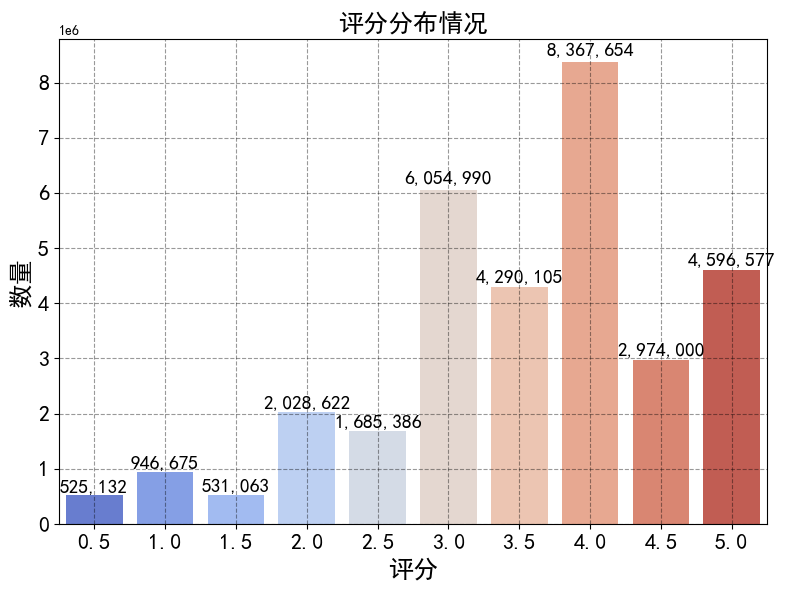

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 统计评分分布
rating_distribution = ratings['rating'].value_counts().sort_index()

# 创建图表
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=rating_distribution.index.astype(str),
                 y=rating_distribution.values, palette='coolwarm')

# 标题与坐标轴标签，设置字体大小
ax.set_title('评分分布情况', fontsize=18)
ax.set_xlabel('评分', fontsize=18)
ax.set_ylabel('数量', fontsize=18)

# 设置刻度字体大小
ax.tick_params(axis='both', labelsize=16)

# 添加数据标签
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01,
            f'{int(height):,}', ha='center', va='bottom', fontsize=14)

# 黑色虚线网格
ax.grid(True, linestyle='--', color='black', alpha=0.4)

plt.tight_layout()
plt.show()


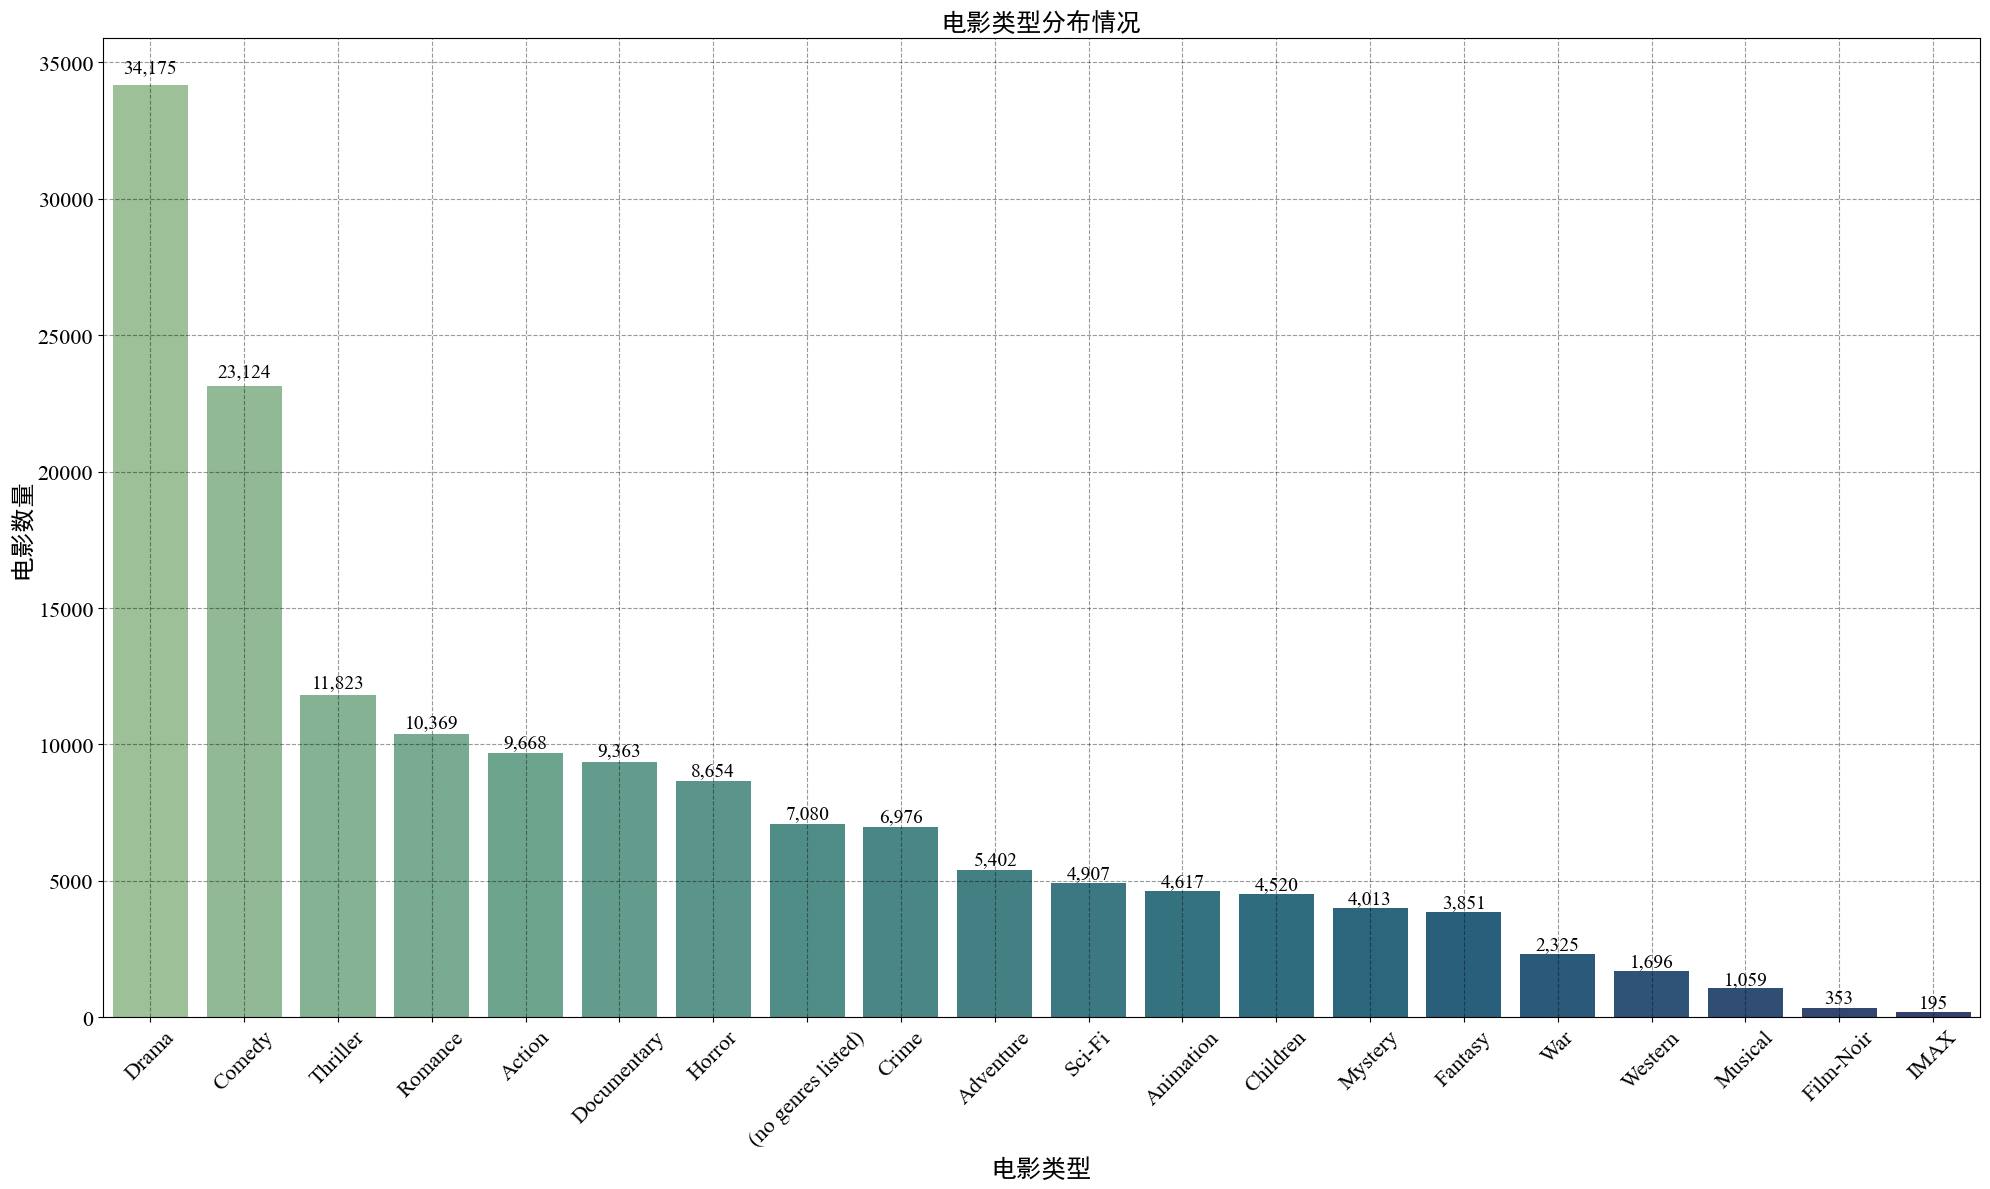

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from collections import Counter
import pandas as pd

# 中文字体：SimHei；英文字体：Times New Roman
font_cn = FontProperties(fname=r"C:\Windows\Fonts\simhei.ttf", size=18)  # 适合中文
font_en = FontProperties(fname=r"C:\Windows\WinSxS\amd64_microsoft-windows-f..etype-timesnewroman_31bf3856ad364e35_10.0.22621.1_none_3f0552ab8d1573b5\times.ttf", size=18)

# 拆分 genres 并统计频次
all_genres = movies['genres'].str.split('|').sum()
genre_counts = Counter(all_genres)
genre_series = pd.Series(genre_counts).sort_values(ascending=False)

# 绘制图表
plt.figure(figsize=(20, 12))
ax = sns.barplot(x=genre_series.index, y=genre_series.values, palette='crest')

# 设置标题和标签，中文采用 font_cn
ax.set_title('电影类型分布情况', fontproperties=font_cn)
ax.set_xlabel('电影类型', fontproperties=font_cn)
ax.set_ylabel('电影数量', fontproperties=font_cn)

# 设置刻度字体：Times New Roman（数字和英文）
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(font_en)
    label.set_fontsize(16)
plt.xticks(rotation=45)

# 添加数值标签（数字用 Times New Roman）
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01,
            f'{int(height):,}', ha='center', va='bottom',
            fontproperties=font_en, fontsize=14)

# 网格线：黑色虚线
ax.grid(True, linestyle='--', color='black', alpha=0.4)

plt.tight_layout()
plt.show()


In [15]:
# 检查缺失值情况
print("Movies 缺失值统计：")
print(movies.isnull().sum())

print("\nRatings 缺失值统计：")
print(ratings.isnull().sum())

print("\nTags 缺失值统计：")
print(tags.isnull().sum())

Movies 缺失值统计：
movieId    0
title      0
genres     0
dtype: int64

Ratings 缺失值统计：
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Tags 缺失值统计：
userId        0
movieId       0
tag          17
timestamp     0
dtype: int64


#### (2)数据预处理

In [3]:
# 处理缺失值
tags['tag'] = tags['tag'].fillna('Unknown')

# 转换时间戳
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

# 数据过滤 (冷用户 + 冷电影过滤)
user_counts = ratings['userId'].value_counts()                     # 统计每个用户打了多少条评分,返回一个 Series,索引是 userId,值是该用户的评分条数
movie_counts = ratings['movieId'].value_counts()                   # 统计每部电影被打了多少次分(即受欢迎程度)
ratings = ratings[ratings['userId'].isin(user_counts[user_counts > 30].index)]    # 保留评分次数大于 20 次的用户的评分数据,过滤掉“只打过少量分”的冷用户
ratings = ratings[ratings['movieId'].isin(movie_counts[movie_counts > 20].index)] # 保留被打分次数超过 10 次的电影,剔除冷门电影,避免数据稀疏

In [ ]:

ratings.to_csv('data/ratings_processed.csv', index=False)
tags.to_csv('data/tags_processed.csv', index=False)
print("预处理完成，数据已保存！")

In [19]:
ratings_process = pd.read_csv(r'data\ratings_processed.csv')
tags_process = pd.read_csv(r'data\tags_processed.csv')
print(f'ratings_processed length: {len(ratings_process)}')
print(f'tags_processed length: {len(tags_process)}')

ratings_processed length: 31717922
tags_processed length: 2000072
